# Import libraries

In [ ]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,VotingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.decomposition import PCA
import os

In [2]:
#to read the csv file 
data = pd.read_csv('MobilePhones.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
data.isnull().sum()
#to check if there are any null values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Visualize the data

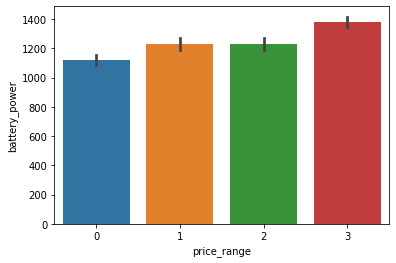

In [26]:
import seaborn as sns
#using bar plot visualizing the x axis as price range and y axis as battery power to see the correlation
sns.barplot(x='price_range', y='battery_power', data=data)

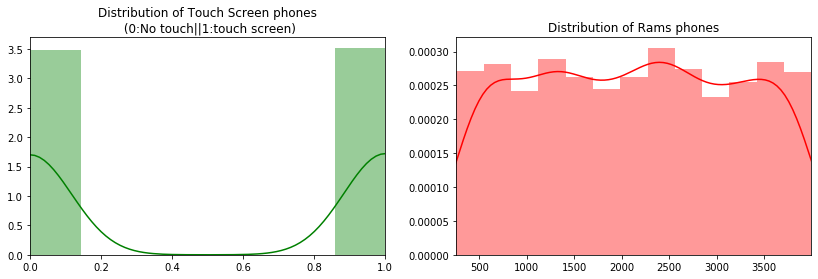

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))

touch_screen = data['touch_screen'].values
ram= data['ram'].values
battery_power =data['battery_power'].values
proccesing_power = data['pc'].values

sns.distplot(touch_screen ,ax=ax[0],color='g')
ax[0].set_title('Distribution of Touch Screen phones\n (0:No touch||1:touch screen)',fontsize=12)
ax[0].set_xlim([min(touch_screen),max(touch_screen)])

sns.distplot(ram ,ax=ax[1],color='r')
ax[1].set_title('Distribution of Rams phones',fontsize=12)
ax[1].set_xlim([min(ram),max(ram)])
plt.show()

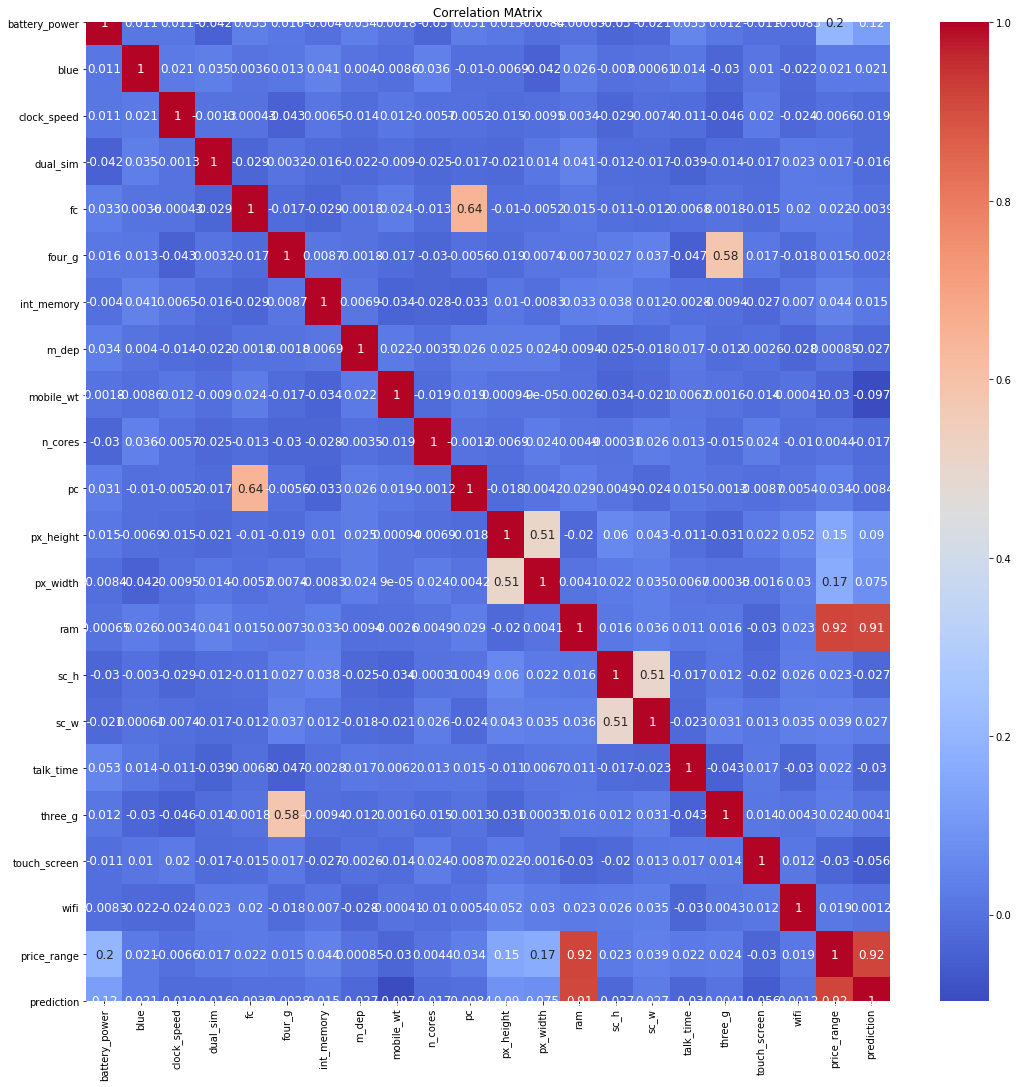

In [30]:
f,ax=plt.subplots(1,1 ,figsize=(18,18))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm',annot_kws={'size':12},ax=ax, annot=True)
ax.set_title("Correlation MAtrix")
plt.show()

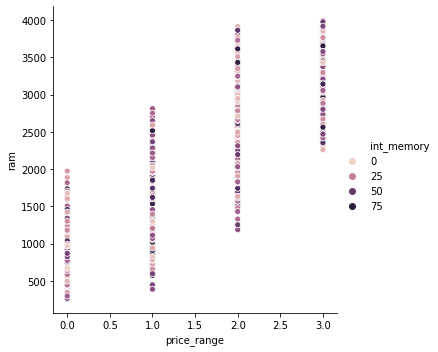

In [32]:
sns.relplot(x='price_range', y='ram', hue='int_memory',data=data)

# Split train and test

In [4]:
X = data.drop('price_range', axis=1) #drop the price column since price will be predicted by the model
y = data['price_range']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#I used 0.20 for the test size and 0.80 for training.

In [6]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import collections
#There are the models that I will train
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [35]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
#To see the accuracy scores of the different models
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=10)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 77.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 92.0 % accuracy score
Classifiers:  SVC Has a training score of 26.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 83.0 % accuracy score


# Train different models

# K Nearest Neighbors (KNN)

In [11]:
#Train the KNN model
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
print(knn.__class__.__name__ , knn.score(X_test,y_test))

KNeighborsClassifier 0.9


In [36]:
#Predict the price_range with KNN
data["predicted_price"] = knn.predict(X)
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,prediction,predicted_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7,19,0,0,1,1,2,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3,7,1,1,0,2,3,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2,9,1,1,0,2,1,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8,11,1,0,0,2,2,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2,15,1,1,0,1,1,1


In [38]:
#Show only the new predicted price_range column 
prd = data[["predicted_price"]]
prd.head(20)

,predicted_price
0,1
1,2
2,2
3,2
4,1
5,1
6,3
7,0
8,0
9,0


# Decision Tree

In [18]:
#Train the Decision Tree model
dct=DecisionTreeClassifier()
dct.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
print(dct.__class__.__name__ , dct.score(X_test,y_test))

DecisionTreeClassifier 0.815


In [39]:
data["predicted_price"] = dct.predict(X)
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,prediction,predicted_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7,19,0,0,1,1,2,2
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3,7,1,1,0,2,3,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2,9,1,1,0,2,1,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8,11,1,0,0,2,2,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2,15,1,1,0,1,1,1


In [40]:
prd_dct = data[["predicted_price"]]
prd_dct.head(20)

,predicted_price
0,2
1,2
2,2
3,2
4,1
5,1
6,3
7,0
8,0
9,0


# Logistic Regression

In [22]:
log_res=LogisticRegression()
log_res.fit(X_train,y_train)

C:\Yeni klasör\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Yeni klasör\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
print(log_res.__class__.__name__ , log_res.score(X_test,y_test))

LogisticRegression 0.78


In [41]:
data["predicted_price"] = log_res.predict(X)
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,prediction,predicted_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7,19,0,0,1,1,2,2
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3,7,1,1,0,2,3,3
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2,9,1,1,0,2,1,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8,11,1,0,0,2,2,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2,15,1,1,0,1,1,1


In [42]:
prd_log = data[["predicted_price"]]
prd_log.head(20)

,predicted_price
0,2
1,3
2,1
3,2
4,1
5,1
6,3
7,0
8,0
9,0


# Discussion

Using such a dataset like this, some correlations can be found between features. Also, using classification, we can predict some features with test data. I used classification to predict price_range. I used different training models. These are KNN, Decision Tree and Logistic Regression. The highest accuracy score belongs to KNN which is 0.9. So we can say that KNN is the best model for this prediction.